In [1]:
import re
import math
import pandas
import functools
import itertools
import unidecode
import collections 
import matplotlib.pyplot

In [2]:
spelling_forms = pandas.read_csv("frecuencia_formas_ortograficas_1_0_junio_2023.txt", sep="\t", usecols=["element", "frequency"], keep_default_na=False)
mottos = pandas.read_csv("frecuencia_lemas_corpes_1_0_junio_2023.txt", sep="\t", usecols=["element", "frequency"], keep_default_na=False)
corpes_sf_m = pandas.concat([spelling_forms, mottos])
corpes_sf_m

,element,frequency
0,de,61616.115
1,la,36117.230
2,que,31536.926
3,y,26460.987
4,en,25097.913
...,...,...
1862847,€39/ud,0.003
1862848,€89/ud,0.003
1862849,●,0.003
1862850,1,0.000


In [3]:
def transliterate(string):
    if 0 < len(string) < 64:
        string = re.sub(r"[^\x20-\x7E]", "", unidecode.unidecode(string.title()))
        return {string, string.replace(chr(32), "")}
    return {}

transliterate("gabriel garcía márquez")

{'Gabriel Garcia Marquez', 'GabrielGarciaMarquez'}

In [4]:
transliterated_data = []
for row in corpes_sf_m.itertuples(index=False):
    transliterations = transliterate(row.element)
    for transliteration in transliterations:
        if transliteration:
            transliterated_data.append([transliteration, row.frequency])
corpes_sf_m = pandas.DataFrame(transliterated_data, columns=["transliterated", "frequency"])
corpes_sf_m 

,transliterated,frequency
0,De,61616.115
1,La,36117.230
2,Que,31536.926
3,Y,26460.987
4,En,25097.913
...,...,...
4130734,EUR39/Ud,0.003
4130735,EUR89/Ud,0.003
4130736,*,0.003
4130737,1,0.000


In [5]:
transliterations = corpes_sf_m.groupby("transliterated")["frequency"].sum().sort_values(ascending=False)
transliterations

transliterated
El                  146633.100
De                  123020.438
Que                  65214.020
,                    63596.264
Y                    56333.857
                       ...    
Heerenveen-Nac           0.003
Heerenveen-La            0.003
Heerdt                   0.003
HeerPhilipsLucas         0.003
~Payaso                  0.003
Name: frequency, Length: 2899416, dtype: float64

In [6]:
transliteration_length = pandas.Series(transliterations.index.str.len())
mean_length = transliteration_length.mean()
std_length = transliteration_length.std()
mean_length, std_length

(11.962823203017436, 5.161746035611102)

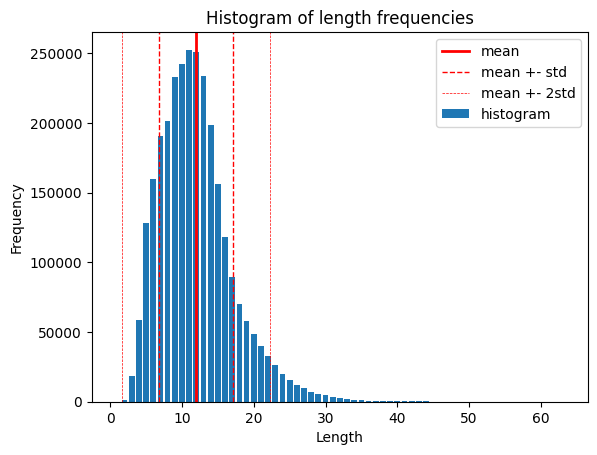

In [7]:
histogram = transliteration_length.value_counts().sort_index()
matplotlib.pyplot.bar(histogram.index, histogram, label="histogram")
matplotlib.pyplot.axvline(x=mean_length-(std_length*2), color="red", linestyle="--", linewidth=0.5)
matplotlib.pyplot.axvline(x=mean_length-std_length, color="red", linestyle="--", linewidth=1)
matplotlib.pyplot.axvline(x=mean_length, color="red", linestyle="-", label="mean", linewidth=2)
matplotlib.pyplot.axvline(x=mean_length+std_length, color="red", linestyle="--", label="mean +- std",linewidth=1)
matplotlib.pyplot.axvline(x=mean_length+(std_length*2), color="red", linestyle="--", label="mean +- 2std",linewidth=0.5)
matplotlib.pyplot.title("Histogram of length frequencies")
matplotlib.pyplot.ylabel("Frequency")
matplotlib.pyplot.xlabel("Length")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [8]:
min_length = 1
max_length = round((mean_length - min_length) * 2)
(min_length, max_length)

(1, 22)

In [9]:
transliterations = transliterations[transliterations.index.str.len() < max_length]
transliterations

transliterated
El                  146633.100
De                  123020.438
Que                  65214.020
,                    63596.264
Y                    56333.857
                       ...    
Heerenveen-Nac           0.003
Heerenveen-La            0.003
Heerdt                   0.003
HeerPhilipsLucas         0.003
~Payaso                  0.003
Name: frequency, Length: 2751822, dtype: float64

In [10]:
transliteration_length = transliterations.index.str.len()
transliteration_length

Index([ 2,  2,  3,  1,  1,  2,  1,  1,  2,  2,
       ...
       11,  5,  6,  5,  7, 14, 13,  6, 16,  7],
      dtype='int64', name='transliterated', length=2751822)

In [11]:
transliteration_length_counts = transliteration_length.value_counts().sort_index()
transliteration_length_counts

transliterated
1         68
2       1442
3      18725
4      58764
5     127953
6     160082
7     190918
8     201688
9     233121
10    242349
11    252588
12    250967
13    233754
14    198509
15    156397
16    118138
17     89566
18     70396
19     57781
20     48317
21     40299
Name: count, dtype: int64

In [12]:
length_frequency_distribution = (transliteration_length_counts / transliteration_length_counts.sum()).sort_index()
length_frequency_distribution

transliterated
1     0.000025
2     0.000524
3     0.006805
4     0.021355
5     0.046498
6     0.058173
7     0.069379
8     0.073293
9     0.084715
10    0.088069
11    0.091789
12    0.091200
13    0.084945
14    0.072137
15    0.056834
16    0.042931
17    0.032548
18    0.025582
19    0.020997
20    0.017558
21    0.014644
Name: count, dtype: float64

In [13]:
length_frequencies_sum = transliterations.groupby(transliteration_length).sum().sort_index() / 1000000
length_frequencies_sum

transliterated
1     0.254489
2     0.543451
3     0.263844
4     0.165756
5     0.209299
6     0.169811
7     0.162835
8     0.131871
9     0.094634
10    0.065445
11    0.042752
12    0.024095
13    0.015710
14    0.009617
15    0.005174
16    0.002195
17    0.001177
18    0.000785
19    0.000486
20    0.000376
21    0.000247
Name: frequency, dtype: float64

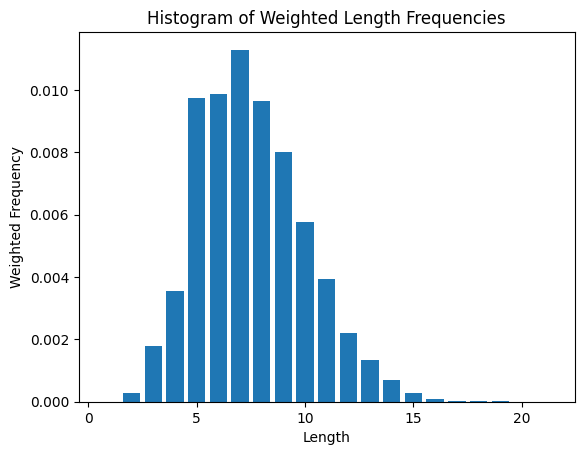

In [14]:
weighted_frequency_sum = length_frequency_distribution * length_frequencies_sum
matplotlib.pyplot.bar(weighted_frequency_sum.index, weighted_frequency_sum, label="histogram")
matplotlib.pyplot.title("Histogram of Weighted Length Frequencies")
matplotlib.pyplot.ylabel("Weighted Frequency")
matplotlib.pyplot.xlabel("Length")
matplotlib.pyplot.show()

In [15]:
levels = 3
max_permutation_sum = math.ceil(mean_length) * levels
max_permutation_sum

36

In [16]:
permutations_strs = []
permutation_frequencies = []

for level in range(1, levels+1):
    permutations = itertools.product(range(min_length, max_length), repeat=level)
    for permutation in permutations:
        permutation_sum = sum(permutation)
        if 8 <= permutation_sum <= max_permutation_sum:
            permutation_frequencies.append(sum(weighted_frequency_sum[num]*num/permutation_sum for num in permutation) * 1/len(permutation))
            permutations_strs.append(" ".join(str(num) for num in permutation))
weighted_permutations = pandas.Series(permutation_frequencies, index=permutations_strs).sort_values(ascending=False)
weighted_permutations

8         0.009665
9         0.008017
10        0.005764
7 7       0.005649
5 7       0.005323
            ...   
21 1      0.000002
1 21      0.000002
21 1 1    0.000001
1 1 21    0.000001
1 21 1    0.000001
Length: 6153, dtype: float64

In [17]:
ratios = [1.0] + [n / 10**i for n in range(1, 10) for i in range(1, 4)]
ratios = sorted(ratios)
ratios

[0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0]

In [18]:
def depth(ratio):
    lower_bound = transliterations.quantile(1.0 - ratio)
    transliterations_ratio = transliterations[transliterations >= lower_bound].index
    return transliterations_ratio.to_series().groupby(transliterations_ratio.str.len()).apply(list).to_dict()

depth_ratios = {depth_ratio: depth(depth_ratio) for depth_ratio in ratios}

In [19]:
def scope(ratio):
    lower_bound = weighted_permutations.quantile(1.0 - ratio)
    permutations_ratio = weighted_permutations[weighted_permutations >= lower_bound].index
    return [tuple(map(int, permutation.split())) for permutation in permutations_ratio]

scope_ratios = {scope_ratio: scope(scope_ratio) for scope_ratio in ratios}

In [20]:
def estimate(depth_ratio, scope_ratio):
    depth_ratio = {length: len(transliteration_list) for length, transliteration_list in depth_ratios[depth_ratio].items()}
    scope_ratio = scope_ratios[scope_ratio]
    permutation_sum = 0
    for permutation in scope_ratio:
        if all(num in depth_ratio for num in permutation):
            permutation_sum += functools.reduce(lambda x, y: x * y, [depth_ratio[num] for num in permutation]) 
    return permutation_sum

depth_scope_ratios = {(depth_ratio, scope_ratio): estimate(depth_ratio, scope_ratio) for depth_ratio in depth_ratios for scope_ratio in scope_ratios}

In [21]:
rules = [":", "l", "u"]

with open("rules/transliterating.rule", "w") as file:
    file.write("\n".join(rules) + "\n")

In [22]:
hourly_max_estimate = 50000 * 60 * 60 / len(rules)
hourly_max_estimate

60000000.0

In [23]:
def best_estimate(hourly_max_estimate, hours=1, criterion="depthscope"):
    estimates = []
    for depth_scope_ratio, ratio_estimate in depth_scope_ratios.items():
        if ratio_estimate <= hourly_max_estimate*hours:
            depth_ratio, scope_ratio = depth_scope_ratio
            estimates.append({
                "depth": depth_ratio,
                "scope": scope_ratio,
                "hours": depth_scope_ratios[depth_scope_ratio]/hourly_max_estimate,
                "depthscope": depth_ratio*scope_ratio
            })
    return tuple(max(estimates, key=lambda x: x[criterion]).items())

day_estimates = collections.Counter(best_estimate(hourly_max_estimate, i+1) for i in range(24)).most_common(1)[0]
day_estimate = dict(day_estimates[0])
day_estimate

{'depth': 0.01,
 'scope': 0.007,
 'hours': 6.565286733333333,
 'depthscope': 7.000000000000001e-05}

In [24]:
depth_str = day_estimate["depth"]
scope_str = day_estimate["scope"]
day_str = round(day_estimates[1]/24, 1)
hours_str = round(day_estimate["hours"])

file_name = f"depth{depth_str:.0e}scope{scope_str:.0e}day{day_str:.0e}hours{hours_str}"
file_name

'depth1e-02scope7e-03day3e-01hours7'

In [25]:
def wordlist(depth_ratio, scope_ratio, file_name):
    with open(f"wordlists/{file_name}.txt", "w") as file:
        for permutation in scope_ratios[scope_ratio]:
            for permutation_tuple in itertools.product(*[depth_ratios[depth_ratio][num] for num in permutation]):
                file.write("".join(permutation_tuple) + "\n")

wordlist(day_estimate["depth"], day_estimate["scope"], file_name)

KeyboardInterrupt: 